In [1]:
import matplotlib.pyplot as plt
import csv

import numpy as np

import pandas as pd

import glob
import os



In [2]:
input_dirs = []
dir_labels = []

fileset = 1

if fileset == 1 :
    
    input_dirs.append( 'output-run-nn-study-nd-v0d-ndim1-res-sf-1.00' )
    dir_labels.append( '1D' )

    input_dirs.append( 'output-run-nn-study-nd-v0d-ndim2-res-sf-1.00' )
    dir_labels.append( '2D' )

    input_dirs.append( 'output-run-nn-study-nd-v0d-ndim4-res-sf-1.00' )
    dir_labels.append( '4D' )

    input_dirs.append( 'output-run-nn-study-nd-v0d-ndim6-res-sf-1.00' )
    dir_labels.append( '6D' )
    
    

    

n_dirs = len( input_dirs )


In [3]:
try:
    os.mkdir( 'paper-plots' )
except:
    print('\n\n Output directory already exists:' )


In [4]:
dirs_rms_mean = []
dirs_rms_cov = []
dirs_ave_fit_err_mean = []
dirs_ave_fit_err_cov = []
dirs_err_ratio = []


for di in range( n_dirs ) :
    
    with open( '%s/parameter-uncertainty-results-trunc.npy' % input_dirs[di], 'rb' ) as f :
        
        print(' dir %2d : %s  %s' % (di, input_dirs[di], dir_labels[di]))
        
        rms_mean = np.load(f, allow_pickle=True )
        rms_cov = np.load(f, allow_pickle=True )
        ave_fit_err_mean = np.load(f, allow_pickle=True )
        ave_fit_err_cov = np.load(f, allow_pickle=True )   
        err_ratio = np.load(f, allow_pickle=True )
        
        dirs_rms_mean.append( rms_mean )
        dirs_rms_cov.append( rms_cov )
        dirs_ave_fit_err_mean.append( ave_fit_err_mean )
        dirs_ave_fit_err_cov.append( ave_fit_err_cov )
        dirs_err_ratio.append( err_ratio )
        
        
    
        

 dir  0 : output-run-nn-study-nd-v0d-ndim1-res-sf-1.00  1D
 dir  1 : output-run-nn-study-nd-v0d-ndim2-res-sf-1.00  2D
 dir  2 : output-run-nn-study-nd-v0d-ndim4-res-sf-1.00  4D
 dir  3 : output-run-nn-study-nd-v0d-ndim6-res-sf-1.00  6D


In [5]:
dirs_ave_val = []
for di in range( n_dirs ) :
    dirs_ave_val.append( np.mean(dirs_err_ratio[di]) )

<function matplotlib.pyplot.show(close=None, block=None)>

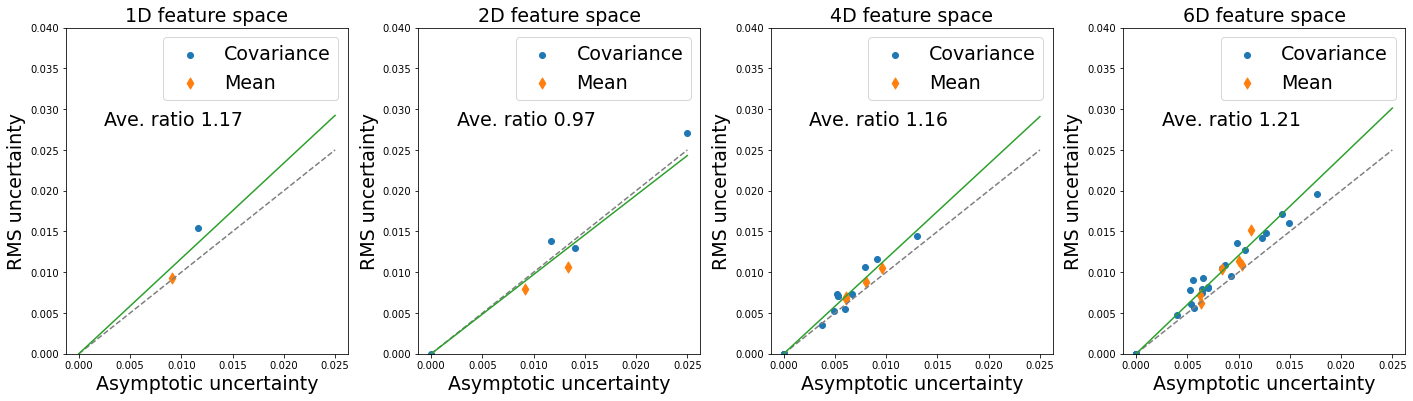

In [6]:
fs = 6

fonts = 19

pmax = 0.025

ymax = 0.04

fig,ax = plt.subplots( 1, 4, figsize=(4*fs,fs))

plt.subplots_adjust( hspace=0.30, wspace=0.25 )


for di in range( n_dirs ) :
    
    axi = ax[di]
    
    axi.plot( [0,pmax], [0,pmax], color='tab:grey', linestyle='dashed')
    axi.plot( [0,pmax], [0,pmax*dirs_ave_val[di]], color='tab:green')

    axi.scatter( dirs_ave_fit_err_cov[di].flatten(), dirs_rms_cov[di].flatten(), 
                color='tab:blue', label='Covariance' )
    axi.scatter( dirs_ave_fit_err_mean[di], dirs_rms_mean[di], 
                color='tab:orange', label='Mean', marker='d', s=61 )

    axi.set_ylim(0, ymax )


    axi.set_xlabel( 'Asymptotic uncertainty', fontsize=fonts )
    axi.set_ylabel( 'RMS uncertainty', fontsize=fonts )

    axi.set_title('%s feature space' % dir_labels[di], fontsize=fonts )
    
    tx = 0.10 * pmax
    ty = 0.70 * ymax
    axi.text( tx, ty, 'Ave. ratio %.2f' % dirs_ave_val[di], fontsize=fonts )
    
    axi.legend( fontsize=fonts )


    
plt.savefig( 'paper-plots/nn-uncertainties-vs-nd.pdf', bbox_inches='tight' )

    
plt.show